### Bike Sharing Demand - Machine Learning
###### [Mission] predicting count feature for total rentals<br>[Data]<br>1) Train: various features for information available prior to the rental period(datetime, season, holiday...)<br>2) Test

### Prepare data

In [313]:
# base
import pandas as pd
import numpy as np
import random as rand
import os

# time
import calendar
from datetime import datetime

# visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor

# warning
import warnings
warnings.filterwarnings('ignore')

# acquire data
test = pd.read_csv('C:/Users/1004/git/kaggle/Bike/test.csv')
train = pd.read_csv('C:/Users/1004/git/kaggle/Bike/train.csv')

In [314]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 4:00,1,0,1,1,10.66,12.880,56,11.0014


<h6>
* Note<br>- season<br>1: spring, 2: summer, 3: fall, 4: winter <br>- weather<br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>
- atemp: "feels like" temperateure in Celsius<br>
- casual: number of non-registered user rentals initiated<br>
- registered: number of registered user rentals initiated<br>
- count: number of total rentals
</h6>

In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [316]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


### Wrangle data

In [317]:
combine = (train, test)

In [318]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [319]:
for i in combine:
    i['tempdate'] = i.datetime.apply(lambda x:x.split())

In [320]:
for i in combine:
    i['year'] = i.tempdate.apply(lambda x:x[0].split('-')[0])
    i['month'] = i.tempdate.apply(lambda x:x[0].split('-')[1])
    i['day'] = i.tempdate.apply(lambda x:x[0].split('-')[2])

In [321]:
for i in combine:
    i['weekday'] = i.tempdate.apply(lambda x:calendar.day_name[datetime.strptime(x[0], "%Y-%m-%d").weekday()])
    i['hour'] = i.tempdate.apply(lambda x:x[1].split(':')[0])

In [322]:
for i in combine:
    i['year'] = pd.to_numeric(i.year, errors = 'coerce')
    i['month'] = pd.to_numeric(i.month, errors = 'coerce')
    i['day'] = pd.to_numeric(i.day, errors = 'coerce')
    i['hour'] = pd.to_numeric(i.hour, errors = 'coerce')

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempdate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [324]:
train = train.drop('tempdate', axis = 1)
test = test.drop('tempdate', axis = 1)
combine = (train, test)

In [325]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,Saturday,4


### Visualization

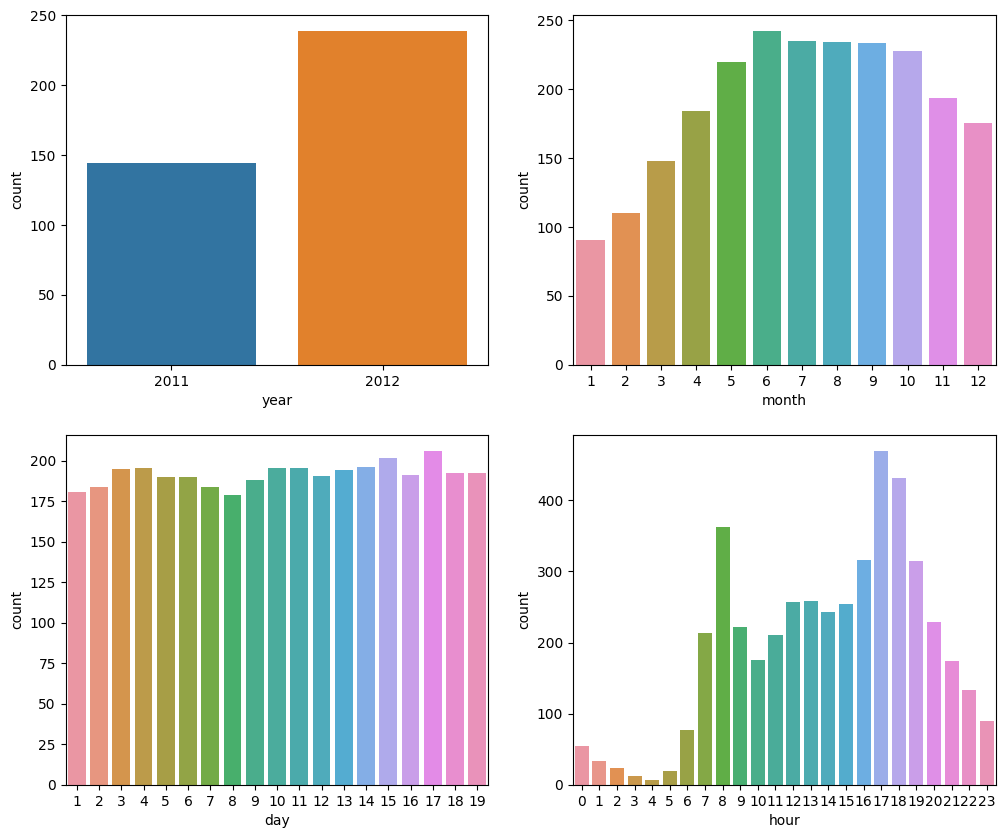

In [326]:
# year - count
fig = plt.figure(figsize = [12, 10])
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x = 'year', y = 'count', data = train.groupby('year')['count'].mean().reset_index())

# month - count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x = 'month', y = 'count', data = train.groupby('month')['count'].mean().reset_index())

# day - count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x = 'day', y = 'count', data = train.groupby('day')['count'].mean().reset_index())

# hour - count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x = 'hour', y = 'count', data = train.groupby('hour')['count'].mean().reset_index())

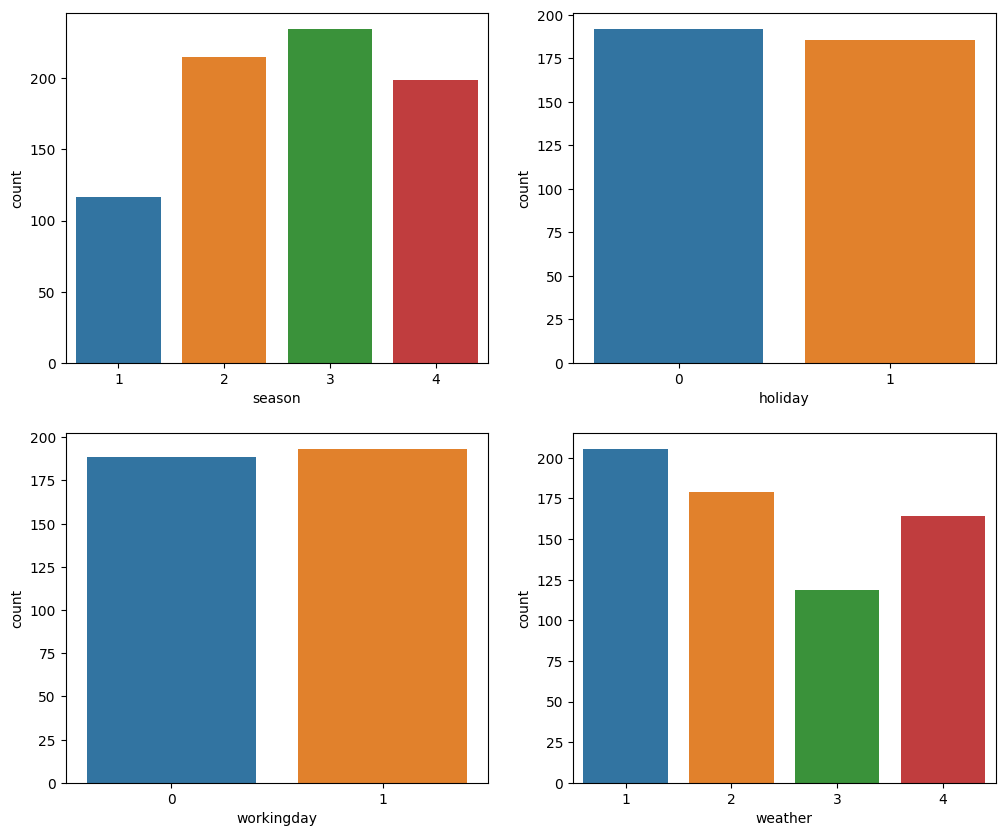

In [327]:
# seasaon - count
fig = plt.figure(figsize = [12, 10])
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x = 'season', y = 'count', data = train.groupby('season')['count'].mean().reset_index())

# holiday - count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x = 'holiday', y = 'count', data = train.groupby('holiday')['count'].mean().reset_index())

# workingday - count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x = 'workingday', y = 'count', data = train.groupby('workingday')['count'].mean().reset_index())

# weather - count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(x = 'weather', y = 'count', data = train.groupby('weather')['count'].mean().reset_index())

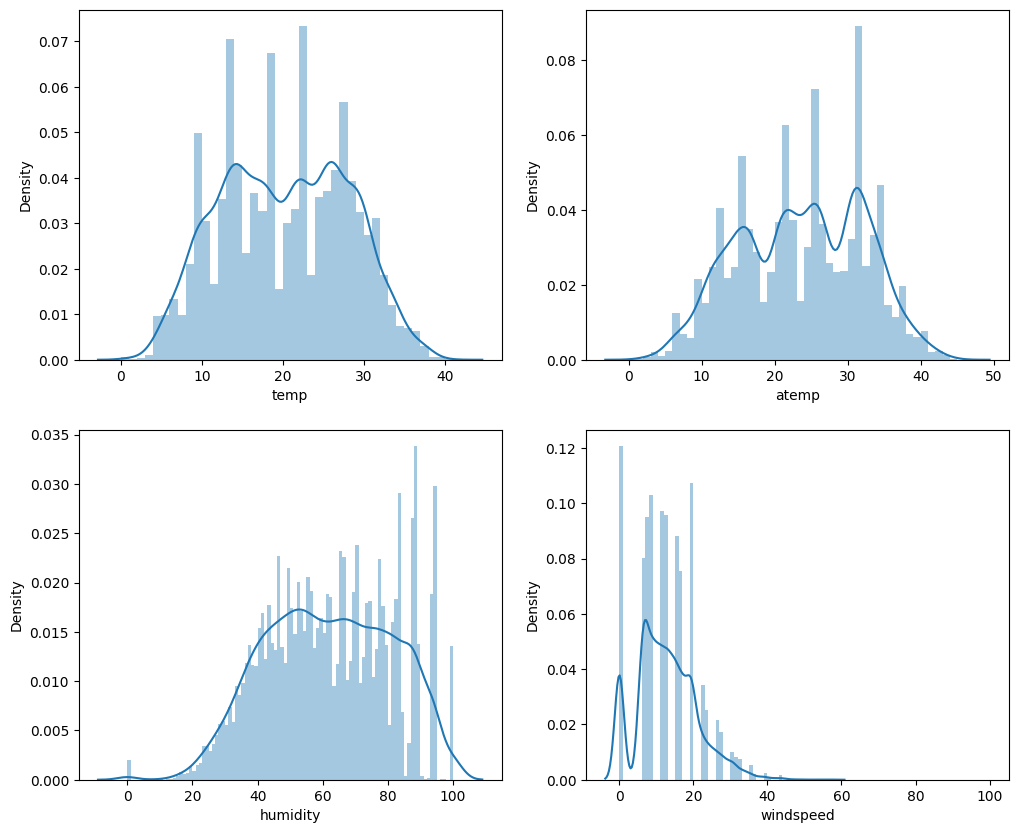

In [328]:
# temp - count
fig = plt.figure(figsize = [12, 10])
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.distplot(train.temp, bins = range(train.temp.min().astype('int'), train.temp.max().astype('int')+1))

# atemp - count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.distplot(train.atemp, bins = range(train.atemp.min().astype('int'), train.atemp.max().astype('int')+1))

# humidity - count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.distplot(train.humidity, bins = range(train.humidity.min().astype('int'), train.humidity.max().astype('int')+1))

# windspeed - count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.distplot(train.windspeed, bins = range(train.windspeed.min().astype('int'), train.humidity.max().astype('int')+1))


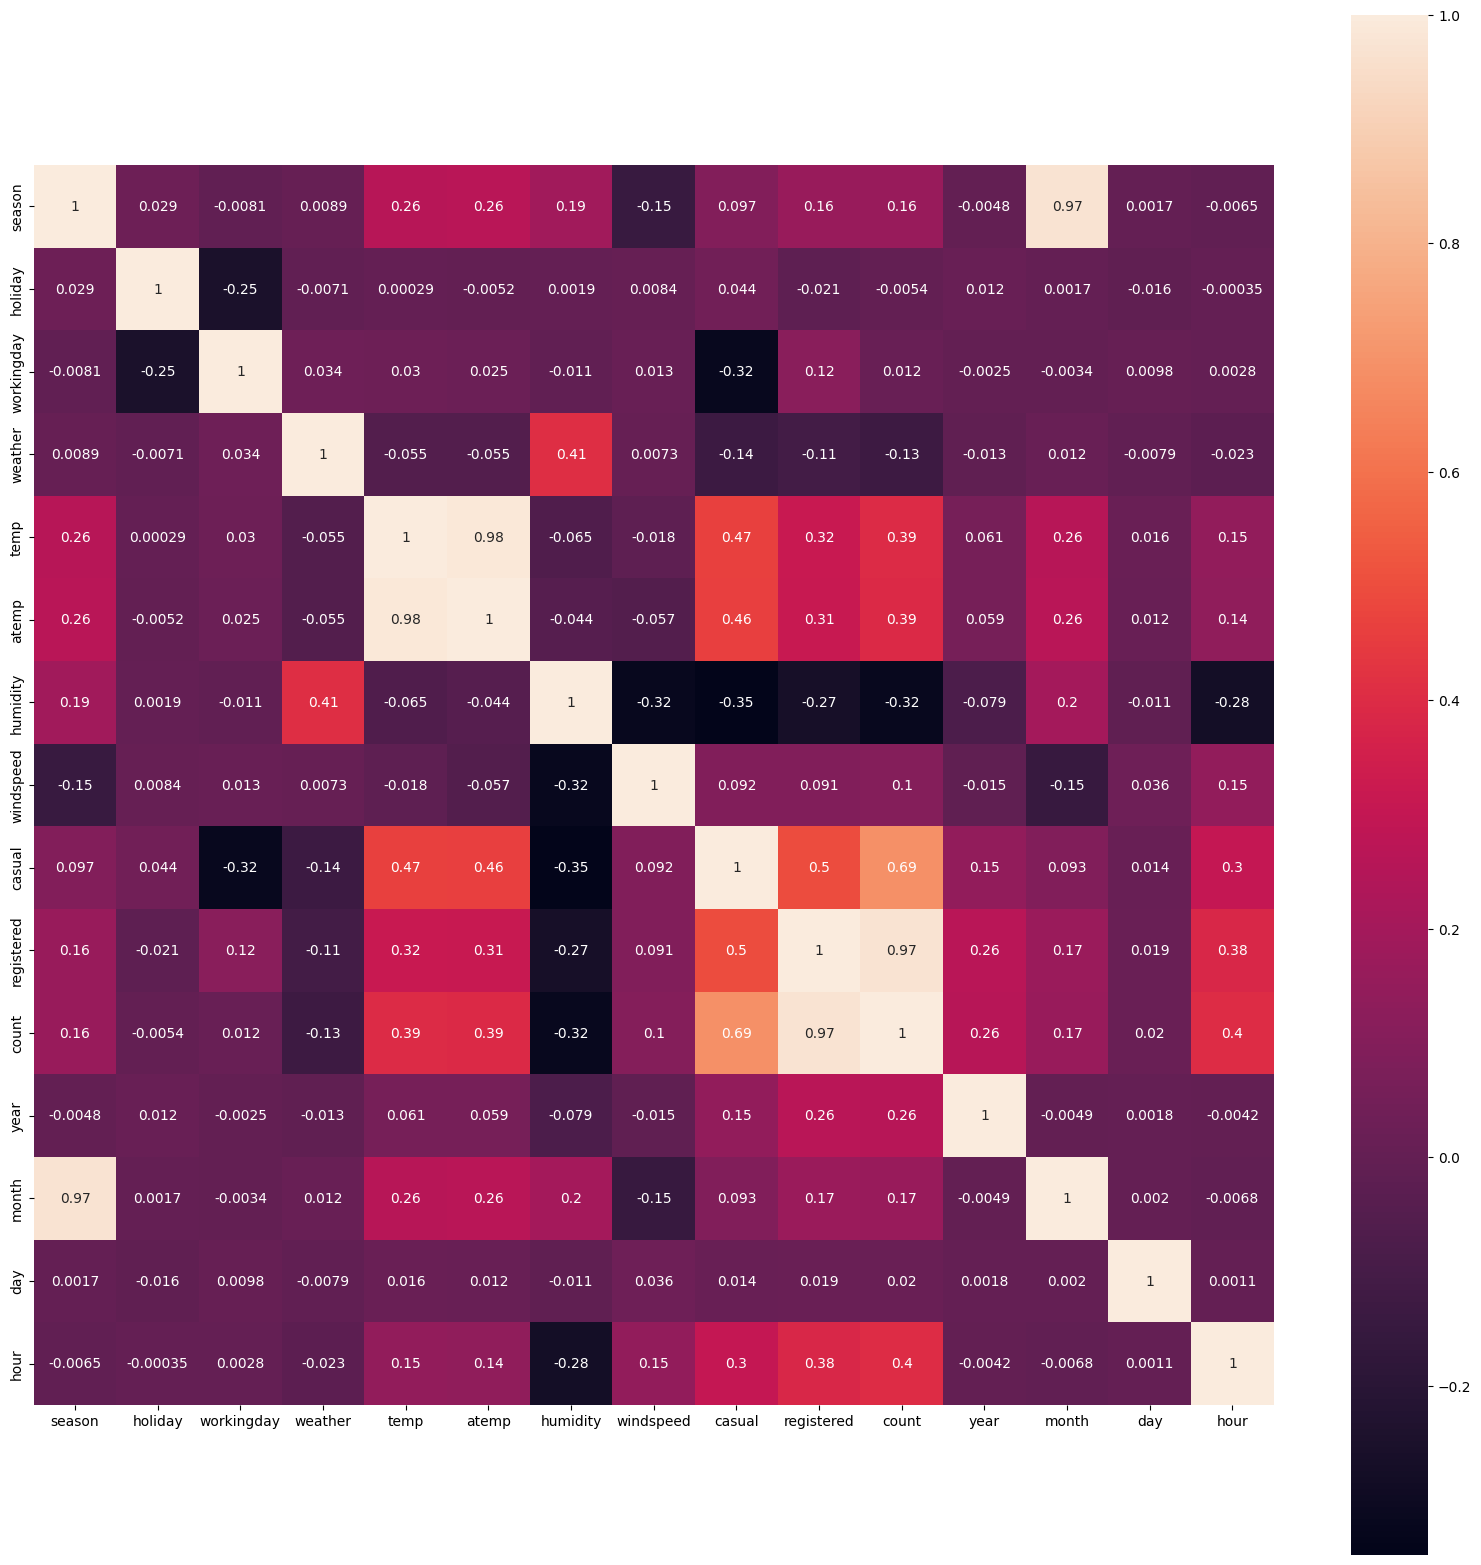

In [329]:
fig = plt.figure(figsize = [20, 20])
ax = sns.heatmap(train.corr(), annot = True, square = True)

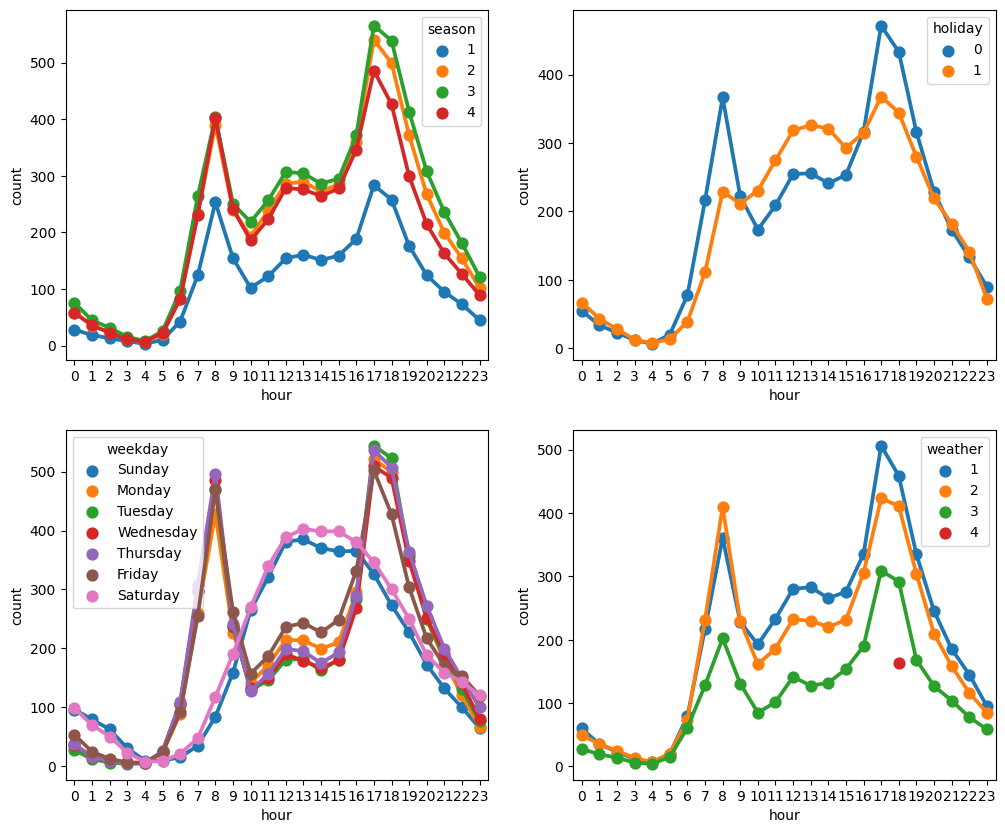

In [330]:
# hour&season - count
fig = plt.figure(figsize = [12, 10])
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.pointplot(x = 'hour', y ='count', hue = 'season', data = train.groupby(['season', 'hour'])['count'].mean().reset_index())

# hour&holiday - count
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.pointplot(x = 'hour', y ='count', hue = 'holiday', data = train.groupby(['holiday', 'hour'])['count'].mean().reset_index())

# hour&weekday - count
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.pointplot(x = 'hour', y ='count', hue = 'weekday', hue_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], data = train.groupby(['weekday', 'hour'])['count'].mean().reset_index())

# hour&weather - count
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.pointplot(x = 'hour', y ='count', hue = 'weather', data = train.groupby(['weather', 'hour'])['count'].mean().reset_index())


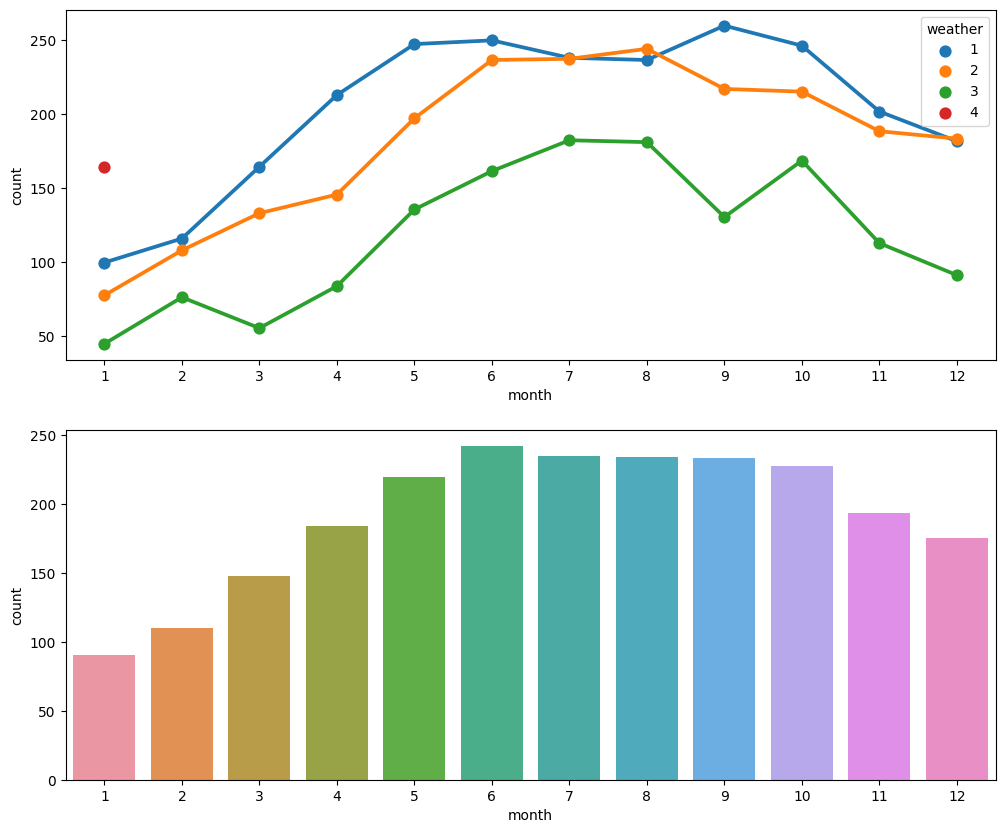

In [331]:
# month&weather - count
fig = plt.figure(figsize = [12, 10])
ax1 = fig.add_subplot(2, 1, 1)
ax1 = sns.pointplot(x = 'month', y = 'count', hue = 'weather', data = train.groupby(['weather', 'month'])['count'].mean().reset_index())

# month - count
ax2 = fig.add_subplot(2, 1, 2)
ax2 = sns.barplot(x = 'month', y = 'count', data = train.groupby('month')['count'].mean().reset_index())

In [332]:
train['weekday'] = train.weekday.astype('category')
test['weekday'] = test.weekday.astype('category')

In [333]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [334]:
train.weekday.cat.categories = ['5', '1', '6', '0', '4', '2', '3']
test.weekday.cat.categories = ['5', '1', '6', '0', '4', '2', '3']

In [335]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,6,0
1,2011-01-01 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,6,1
2,2011-01-01 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,6,2
3,2011-01-01 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,6,3
4,2011-01-01 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,6,4


In [336]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,weekday,hour
0,2011-01-20 0:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,4,0
1,2011-01-20 1:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,4,1
2,2011-01-20 2:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,4,2
3,2011-01-20 3:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,3
4,2011-01-20 4:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,4


In [337]:
train[train.windspeed == 0]['windspeed']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10826    0.0
10829    0.0
10846    0.0
10860    0.0
10862    0.0
Name: windspeed, Length: 1313, dtype: float64

In [338]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  int64   
 14  day         10886 non-null  int64   
 15  weekday     10886 non-null  category
 16  hour        10886 non-null  int64   
dtypes: category(1), float64(3), int64(12), object(1)
memory usage: 1.3+ MB


In [339]:
windspeed_0 = train[train.windspeed == 0]
windspeed_Not0 = train[train.windspeed != 0]

windspeed_0_df = windspeed_0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis = 1)
windspeed_Not0_df = windspeed_Not0.drop(['windspeed', 'casual', 'registered', 'count', 'datetime'], axis = 1)
windspeed_Not0_series = windspeed_Not0['windspeed']

rfc = RandomForestRegressor()
rfc.fit(windspeed_Not0_df, windspeed_Not0_series)

predict_windspeed_0 = rfc.predict(windspeed_0_df)
windspeed_0['windspeed'] = predict_windspeed_0

In [340]:
train = pd.concat([windspeed_0, windspeed_Not0], axis = 0)

In [341]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  int64   
 2   holiday     10886 non-null  int64   
 3   workingday  10886 non-null  int64   
 4   weather     10886 non-null  int64   
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  year        10886 non-null  int64   
 13  month       10886 non-null  int64   
 14  day         10886 non-null  int64   
 15  weekday     10886 non-null  category
 16  hour        10886 non-null  int64   
dtypes: category(1), float64(3), int64(12), object(1)
memory usage: 1.4+ MB


In [342]:
windspeed_0 = test[test.windspeed == 0]
windspeed_Not0 = test[test.windspeed != 0]

windspeed_0_df = windspeed_0.drop(['windspeed','datetime'], axis = 1)
windspeed_Not0_df = windspeed_Not0.drop(['windspeed', 'datetime'], axis = 1)
windspeed_Not0_series = windspeed_Not0['windspeed']

rfc = RandomForestRegressor()
rfc.fit(windspeed_Not0_df, windspeed_Not0_series)

predict_windspeed_0 = rfc.predict(windspeed_0_df)
windspeed_0['windspeed'] = predict_windspeed_0

In [343]:
test = pd.concat([windspeed_0, windspeed_Not0], axis = 0)

In [344]:
train.datetime = pd.to_datetime(train.datetime, errors = 'coerce')
test.datetime = pd.to_datetime(test.datetime, errors = 'coerce')

In [345]:
train = train.sort_values(by = 'datetime')
test = test.sort_values(by = 'datetime')

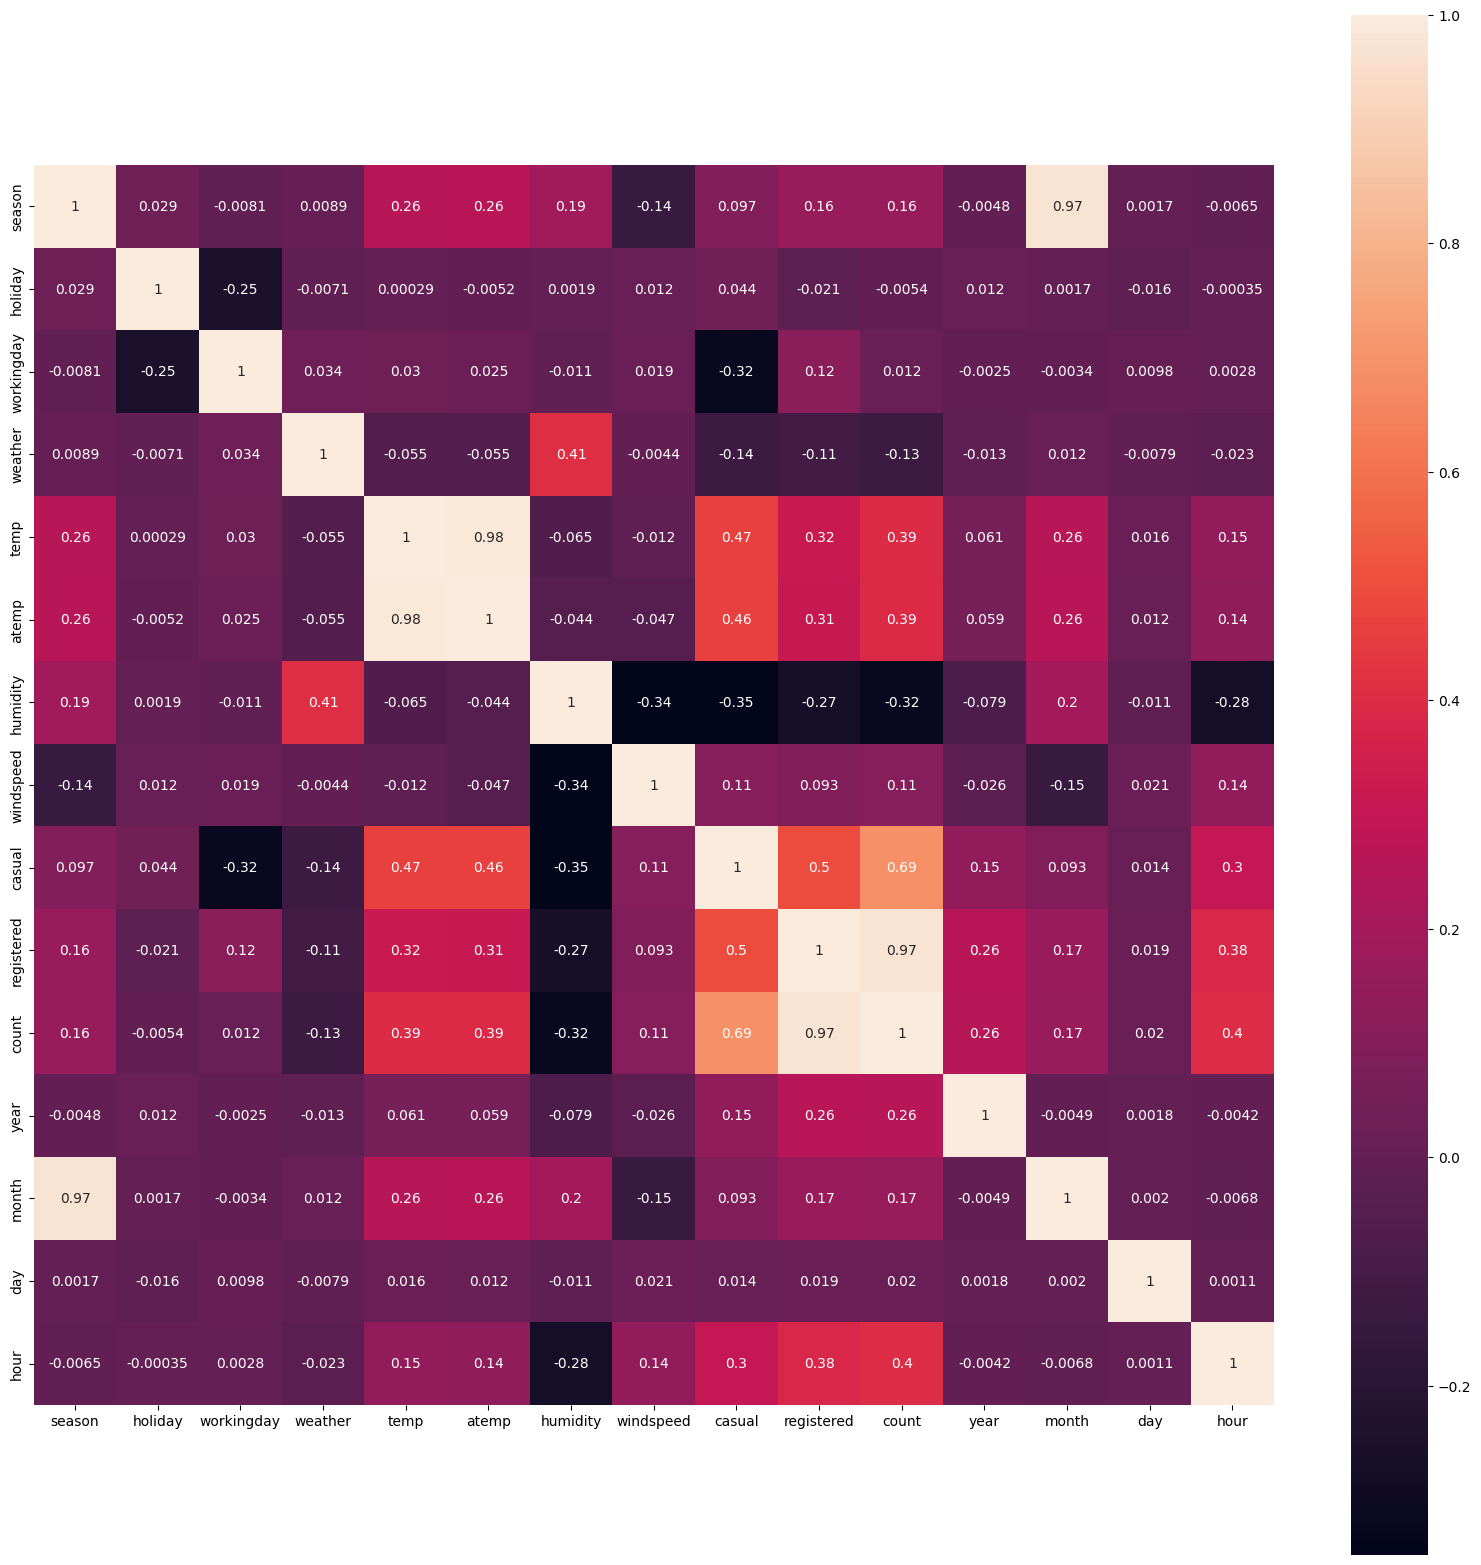

In [346]:
fig = plt.figure(figsize = [20, 20])
ax = sns.heatmap(train.corr(), annot = True, square = True)

Min value of windspeed is 6.0032


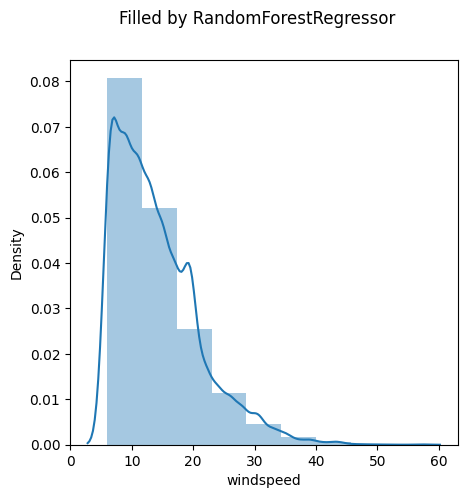

In [347]:
fig = plt.figure(figsize = [5, 5])
sns.distplot(train['windspeed'], bins = np.linspace(train['windspeed'].min(), train['windspeed'].max(), 10))
plt.suptitle("Filled by RandomForestRegressor")
print("Min value of windspeed is {}".format(train['windspeed'].min()))

In [348]:
combine = (train, test)

In [349]:
categorical_col = ['holiday', 'humidity', 'season', 'weather', 'workingday', 'year', 'month', 'day', 'hour']
drop_col = ['datetime', 'casual', 'registered', 'count']
float_col = ['temp', 'atemp', 'weekday']

In [350]:
for i in combine:
    for col in categorical_col:
        i[col] = i[col].astype('category')

In [351]:
for i in combine:
    for col in float_col:
        i[col] = i[col].astype('int')

### Model, predict and solve

In [352]:
datetimecol = test['datetime']
Y_train = train['count']
Y_train_regis = train['registered']
Y_train_cas = train['casual']

In [353]:
train = train.drop(drop_col, axis = 1)
test = test.drop(['datetime'], axis = 1)

In [354]:
# RMSLE
def rmsle(y, y_, convertExp = True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    cal = (log1 - log2) ** 2
    return np.sqrt(np.mean(cal))

In [355]:
# linear regression
Y_train_log = np.log1p(Y_train)

lr = LinearRegression()
lr.fit(train, Y_train_log)
Y_pred = lr.predict(train)

print('RMSLE Value For LinearRegression: {}'.format(rmsle(np.exp(Y_train_log), np.exp(Y_pred), False)))

RMSLE Value For LinearRegression: 0.9771225525159402


10886


10739

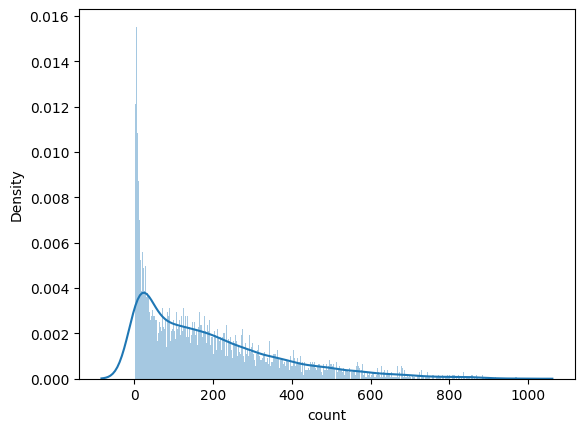

In [356]:
# visualization
sns. distplot(Y_train, bins = range(Y_train.min().astype(int), Y_train.max().astype(int)))

print(Y_train.count())

# check sigma
Y_train[np.logical_and(Y_train.mean() - 3*Y_train.std() <= Y_train, Y_train.mean() + 3*Y_train.std() >= Y_train)].count()

In [357]:
# ridge model
ridge = Ridge()

ridge_params = {'max_iter':[3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better = False)
grid_ridge = GridSearchCV(ridge, ridge_params, scoring = rmsle_scorer, cv = 5)

grid_ridge.fit(train, Y_train_log)
Y_pred = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(Y_train_log), np.exp(Y_pred), False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9771225522900312


In [358]:
df = pd.DataFrame(grid_ridge.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004618,0.000857,0.004951,0.001149,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-0.999868,-0.904381,-1.033818,-1.008009,-0.980750,-0.985365,0.043933,1
1,0.004319,0.000478,0.003658,0.000463,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-0.999868,-0.904381,-1.033818,-1.008008,-0.980750,-0.985365,0.043933,2
2,0.003851,0.000576,0.003622,0.000504,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-0.999870,-0.904381,-1.033819,-1.008007,-0.980750,-0.985365,0.043933,3
3,0.003183,0.000280,0.004610,0.000505,1,3000,"{'alpha': 1, 'max_iter': 3000}",-0.999883,-0.904382,-1.033828,-1.007995,-0.980750,-0.985368,0.043934,4
4,0.004162,0.000455,0.003897,0.000764,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.000025,-0.904393,-1.033921,-1.007877,-0.980755,-0.985394,0.043948,5


In [359]:
# lasso
lasso = Lasso()

lasso_params = {'max_iter':[3000], 'alpha':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(lasso, lasso_params, scoring = rmsle_scorer, cv = 5)

grid_lasso.fit(train, Y_train_log)
Y_pred = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(Y_train_log), np.exp(Y_pred), False)))

RMSLE Value for Lasso Regression 0.9771413637959887


In [360]:
rfc = RandomForestRegressor()

rfc_params = {'n_estimators':[1, 10, 100]}
grid_rfc = GridSearchCV(rfc, rfc_params, scoring = rmsle_scorer, cv = 5)
grid_rfc.fit(train, Y_train_log)
Y_pred = grid_rfc.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(Y_train_log), np.exp(Y_pred), False)))

RMSLE Value for RandomForest 0.10262436493062783


In [364]:
gb = GradientBoostingRegressor()
gb_params = {'max_depth':range(1, 11, 1), 'n_estimators':[1, 10, 100]}
grid_gb = GridSearchCV(gb, gb_params, scoring = rmsle_scorer, cv = 5)

grid_gb.fit(train, Y_train_log)
Y_pred = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(Y_train_log), np.exp(Y_pred), False)))

RMSLE Value for GradientBoosting 0.20814025858662


<AxesSubplot:ylabel='Density'>

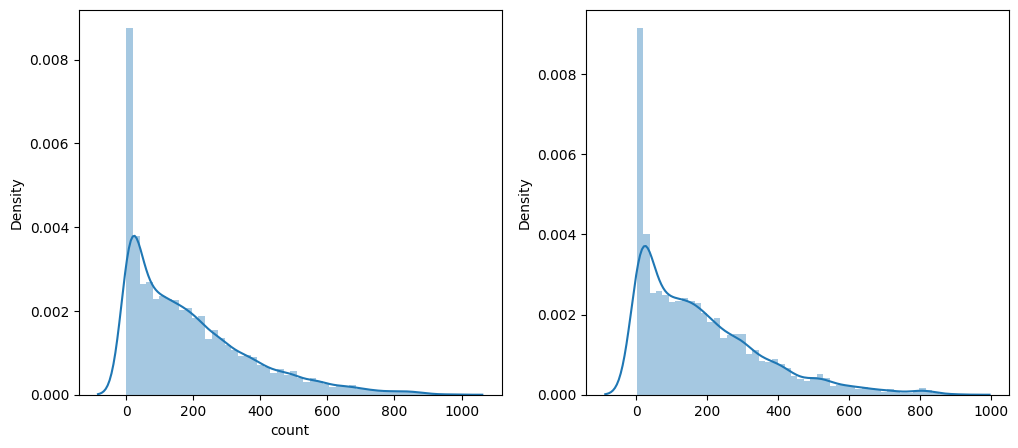

In [366]:
Y_predsTest = grid_gb.predict(test)
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12, 5)
sns.distplot(Y_train, ax = ax1, bins = 50)
sns.distplot(np.exp(Y_predsTest), ax = ax2, bins = 50)

In [367]:
submission = pd.DataFrame({"datetime": datetimecol,
                           "count": [max(0, x) for x in np.exp(Y_predsTest)]})

In [368]:
submission

,datetime,count
0,2011-01-20 00:00:00,9.404203
1,2011-01-20 01:00:00,5.979598
2,2011-01-20 02:00:00,4.180119
3,2011-01-20 03:00:00,3.119063
4,2011-01-20 04:00:00,3.100939
...,...,...
6488,2012-12-31 19:00:00,321.167039
6489,2012-12-31 20:00:00,229.598946
6490,2012-12-31 21:00:00,153.700342
6491,2012-12-31 22:00:00,102.807598


###### * 아래 링크를 참고 했으며, 개인적인 공부를 위한 코드입니다.<br>참고) https://www.kaggle.com/code/kwonyoung234/for-beginner